In [ ]:
# K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [6]:
print(X.shape)


(500, 2)


In [ ]:
# not really needed, b'cos it is unsupervised learning
np.unique(y)

array([0, 1, 2, 3, 4])

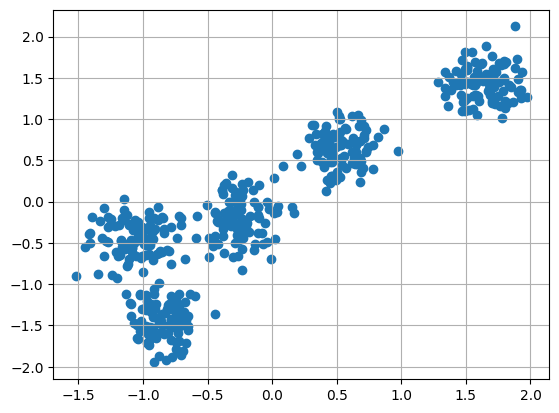

In [11]:
# Data Visualise 
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

X = normalise(X)

plt.grid()
plt.scatter(X[:,0], X[:,1])
plt.show()

In [19]:
# Init the k-centers for k clusters 

k = 5
colors = ["green","red","blue","yellow","orange"]
n_features = 2

def init(k):
    centroids = {}
    for i in range(k):
        center = 2*(2*np.random.random((n_features,)) - 1)
        
        centroids[i] = {
            'center' : center,
            'color' : colors[i],
            'points' : []
        }
        print(center)
    return centroids

centroids = init(k)
centroids

[-0.66350873 -1.43627352]
[-0.98406566  0.01373087]
[1.33203919 0.95892577]
[ 0.03466883 -0.12613719]
[-1.50251884 -0.69224843]


{0: {'center': array([-0.66350873, -1.43627352]),
  'color': 'green',
  'points': []},
 1: {'center': array([-0.98406566,  0.01373087]),
  'color': 'red',
  'points': []},
 2: {'center': array([1.33203919, 0.95892577]), 'color': 'blue', 'points': []},
 3: {'center': array([ 0.03466883, -0.12613719]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([-1.50251884, -0.69224843]),
  'color': 'orange',
  'points': []}}

In [22]:
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2)) # Euclidean Distance: Euclidean =  sqrt[∑(p(i) - q(i))^2]

# Step 2a (Update cluster assignments)

def assignPtsToCluster(X,centroids):
    m = X.shape[0]

    # each point will be assigned to exactly one of the clusters 
    for i in range(m):
        cdist = []
        cx = X[i]
        # find out distance of pt from each centroid
        for kx in range(k):
            d = distance(centroids[kx]['center'],cx)
            cdist.append(d)

        clusterId = np.argmin(cdist)
        #assign the point to the list of points that current_cluster(clusterId) holds
        centroids[clusterId]['points'].append(cx)

In [27]:
# Step 2b - Update Centroids
def updateClusters(centroids):

    # Update Every Centroid by taking a mean of points assigned to the cluster 
    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        # if a cluster has non-zero points
        if pts.shape[0] > 0: 
            newCenter = pts.mean(axis=0)
            centroids[kx]['center'] = newCenter 
            centroids[kx]['points'] = [] #Clear the list for step 2a 

In [28]:
def plotClusters(centroids):

    for kx in range(k):
        pts = np.array(centroids[kx]['points'])

        # Plot the Points
        if(pts.shape[0]>0):
            plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])

        # Plot the Cluster Center (Centroid)
        uk = centroids[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')

[ 0.94540537 -0.15384062]
[-1.24559763 -0.87016702]
[ 0.51712606 -1.66363801]
[-0.53530475  1.28380822]
[-0.21362102 -0.91157197]


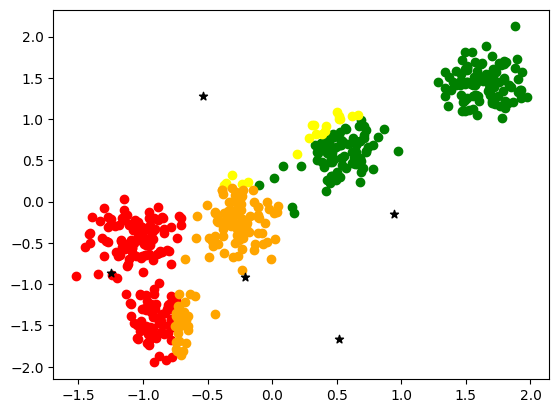

In [42]:
centroids = init(k)
assignPtsToCluster(X,centroids)
plotClusters(centroids)

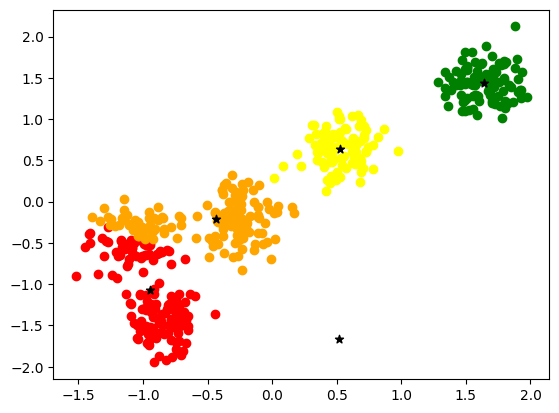

In [47]:
assignPtsToCluster(X,centroids)
plotClusters(centroids)
updateClusters(centroids)


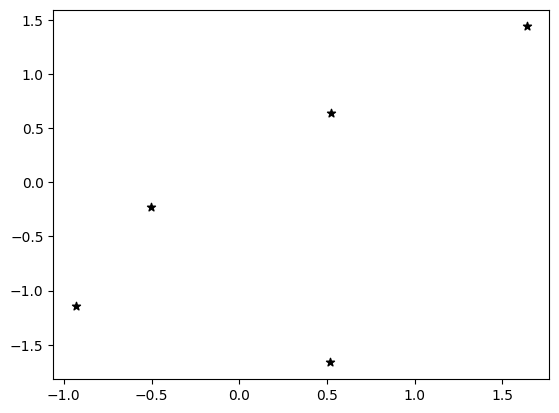

In [48]:
plotClusters(centroids)